In [26]:
import numpy as np
import pylab as pl
import json
import os
import urllib2
from scipy.optimize import curve_fit, minimize
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [27]:
#distributions = ['gaus', 'pois','binom','chisq','lap','wald']
mymean = 50
distributions = {}
means = {}

[1954 1448  543  981  166  521 1515 1761 1926  223  523  391 1708 1652  577
 1483  695  431  405  258  421 1278  828 1146 1872  697  613  349  624  260
 1495  691 1734 1816 1954 1169  866 1178  156  453  480  975 1708  691  162
 1694 1223  237  730 1538  418  792 1819 1251 1319 1662  599 1268 1935 1584
 1785 1841 1516  880 1276 1373  680 1947 1596 1980 1442  878 1742  345  323
 1195  338 1219 1984  952 1634   22  387 1540  500 1107 1319  219  191  633
  469 1218   44 1492  708  759  492 1716  720 1019]


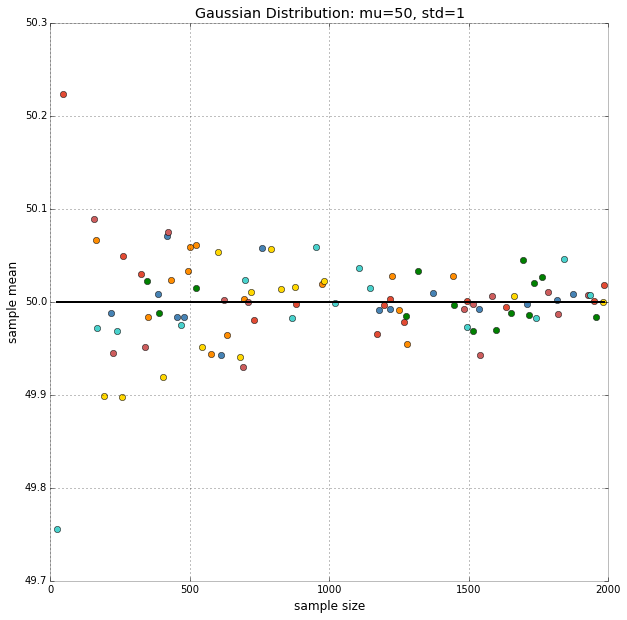

In [28]:
#create gaussian distribution
distributions['gaus'] = {}
gaus_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (gaus_size)
# We'll set the standard deviation arbitrarily.
gaus_std = 1
for n in gaus_size:
    #setting std to 1
    distributions['gaus'][n]=np.random.normal(mymean,gaus_std,size=n)

means['gaus'] = {}
    
#plot gaussian distribution
fig_gaus_mu_N = pl.figure(figsize=(10,10))
axgaus = fig_gaus_mu_N.add_subplot(111)
for nn in distributions['gaus']:
    means['gaus'][nn] = distributions['gaus'][nn].mean()
    axgaus.plot(nn, means['gaus'][nn], 'o')
    axgaus.set_title('Gaussian Distribution: mu={}, std={}'.format(mymean,gaus_std))
    axgaus.set_xlabel('sample size')
    axgaus.set_ylabel('sample mean')
    axgaus.plot([min(gaus_size), max(gaus_size)],[mymean,mymean],'k')

[ 102 1267  358  876 1112 1973  166 1304 1481  484  769 1563 1169 1678 1303
  955 1542  873 1006  817 1844  958 1708 1293  880  698 1755  737 1939 1620
 1714  638  274  249  937  358  806  123 1756  314 1590 1587 1879  574  845
   24 1695 1538 1725 1811  724  550 1029  135  982 1150 1808  381 1943 1137
 1492 1954 1681  579 1859  391 1249  337  597 1447 1673 1408  237  827 1301
  912 1941  616  463 1007 1843 1212 1963 1473 1374  968 1909  443 1768  842
  698 1126 1344  864  759 1602   73 1931 1304 1360]


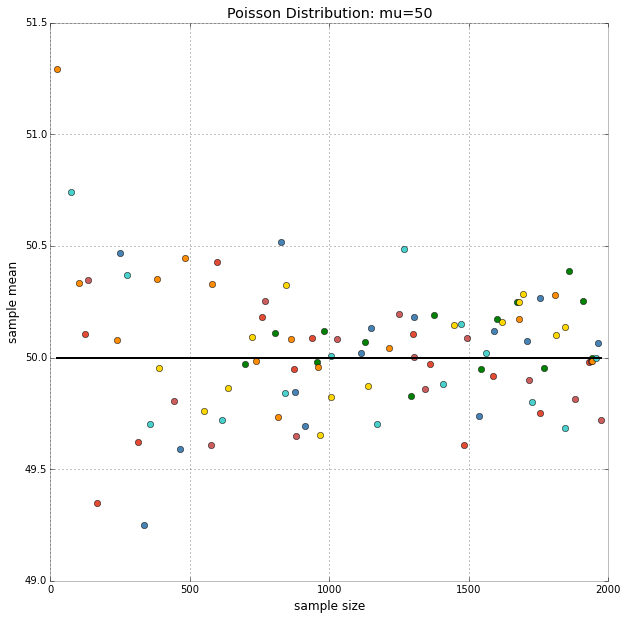

In [29]:
#create poisson distribution
distributions['pois'] = {}
pois_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (pois_size)
for n in pois_size:
    #lamba = mymean
    distributions['pois'][n]=np.random.poisson(mymean,size=n)

means['pois'] = {}
    
#plot poisson distribution
fig_pois_mu_N = pl.figure(figsize=(10,10))
axpois = fig_pois_mu_N.add_subplot(111)
for nn in distributions['pois']:
    means['pois'][nn] = distributions['pois'][nn].mean()
    axpois.plot(nn, means['pois'][nn], 'o')
    axpois.set_title('Poisson Distribution: mu={}'.format(mymean))
    axpois.set_xlabel('sample size')
    axpois.set_ylabel('sample mean')
    axpois.plot([min(pois_size), max(pois_size)],[mymean,mymean],'k')

[1438 1172 1959 1903  941  447 1892  387 1908  128  783 1819 1499  927  734
  555 1385  458  740  514 1925  893  426 1157  704 1986  466 1273 1131 1941
  538 1782  433  336  800  536  660 1847  986  592  363 1024 1634   60 1265
 1504  250  303  243  865 1586  306 1703  431 1610  182   45 1115 1991 1285
  442 1864 1092 1670  695 1846  481 1559  970 1173 1321 1343 1685  546   89
  164 1962  910   31 1194 1135   53  878 1359   76 1924 1411 1586 1884 1534
 1466 1432  742  794  878  471 1503 1491  158  909]


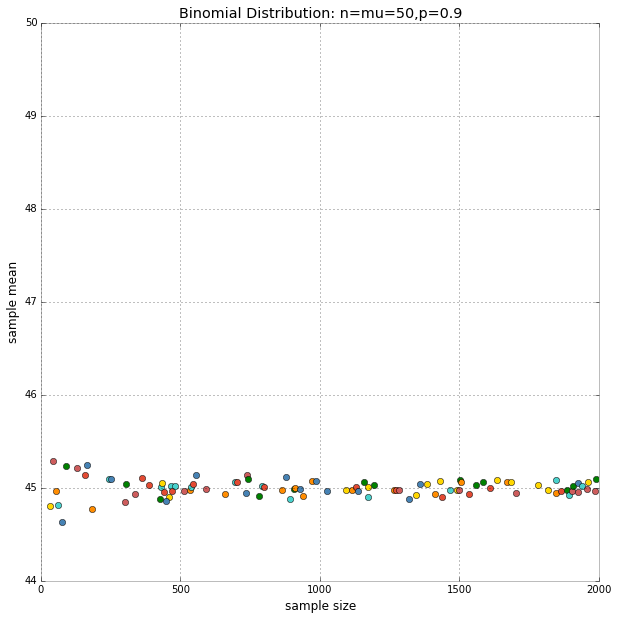

In [30]:
#create binomial distribution
distributions['binom'] = {}
binom_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (binom_size)
# binomial disributions describe dichotomous outcomes (i.e. pass/fail) 
# for a given number of trials. 
# To simulate such an outcome I'm giving a probability of success an arbitrary value
p=.90
for n in binom_size:
    distributions['binom'][n]=np.random.binomial(mymean,p,size=n)

means['binom'] = {}

#plot binomial distribution
fig_binom_mu_N = pl.figure(figsize=(10,10))
axbinom = fig_binom_mu_N.add_subplot(111)
for nn in distributions['binom']:
    means['binom'][nn] = distributions['binom'][nn].mean()
    axbinom.plot(nn, means['binom'][nn], 'o')
    axbinom.set_title('Binomial Distribution: n=mu={},p={}'.format(mymean,p))
    axbinom.set_xlabel('sample size')
    axbinom.set_ylabel('sample mean')
    axbinom.plot([min(binom_size), max(binom_size)],[mymean,mymean],'k')

[ 846   15  806 1526  872  843 1251 1438  388 1242  582  944  872 1009  948
  555  466 1870 1417 1396 1500  718 1776 1239  975  375  944 1567 1022  184
 1801   27 1184 1093  234  723 1312  759  108 1692  573 1745  235  329  126
 1603   92 1096  396 1702  907 1153 1726 1897 1886 1663   14 1663  609  197
  558 1220 1684  553 1113  754 1418 1291 1105 1515  278 1777  247  977 1211
  500 1196 1981 1035  261  509  361 1673  742 1079 1261 1821 1774  335 1072
 1698 1571  644 1776  261 1715  996 1451  147 1977]


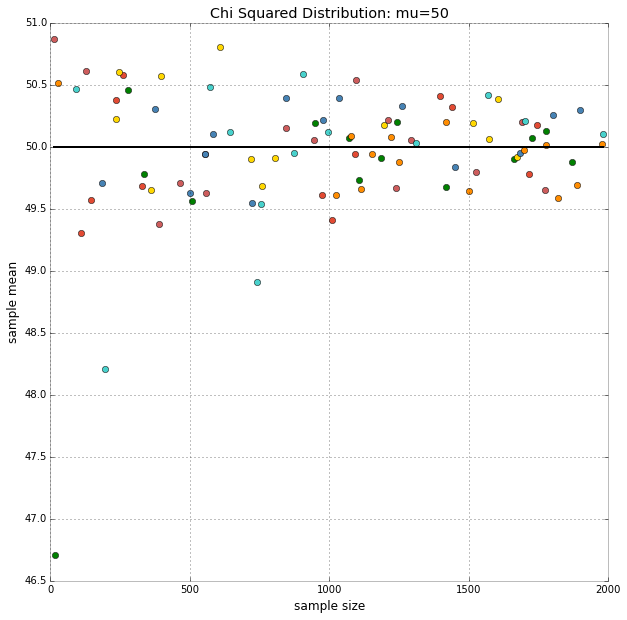

In [31]:
#create chi^2 distribution
distributions['chisq'] = {}

chisq_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (chisq_size)
# df is equal to mean
df = mymean
for n in chisq_size:
    distributions['chisq'][n]=np.random.chisquare(mymean,size=n)

means['chisq'] = {}

#plot chi^2 distribution
fig_chisq_mu_N = pl.figure(figsize=(10,10))
axchisq = fig_chisq_mu_N.add_subplot(111)
for nn in distributions['chisq']:
    means['chisq'][nn] = distributions['chisq'][nn].mean()
    axchisq.plot(nn, means['chisq'][nn], 'o')
    axchisq.set_title('Chi Squared Distribution: mu={}'.format(mymean))
    axchisq.set_xlabel('sample size')
    axchisq.set_ylabel('sample mean')
    axchisq.plot([min(chisq_size), max(chisq_size)],[df,df],'k')

[1813  350 1891  756 1010 1692 1769  482 1528 1075  966  960  150 1497 1115
 1710  191 1735  753  866  626 1608  342  485  970 1363 1804  887  150  946
  242 1892 1494 1934  416 1077  666  593 1507  506  283 1995 1128 1796 1766
  229 1981   84 1058  216  562  835 1642 1943  659  207 1900  383 1227  580
 1539 1966 1046 1524 1464  120   73   79  645 1633 1039  229  431 1394 1178
 1661 1288 1622 1683  695 1598  153  347  841  174  900  583  130  724 1147
 1407  288 1503 1061  391 1644 1323  349 1223  632]


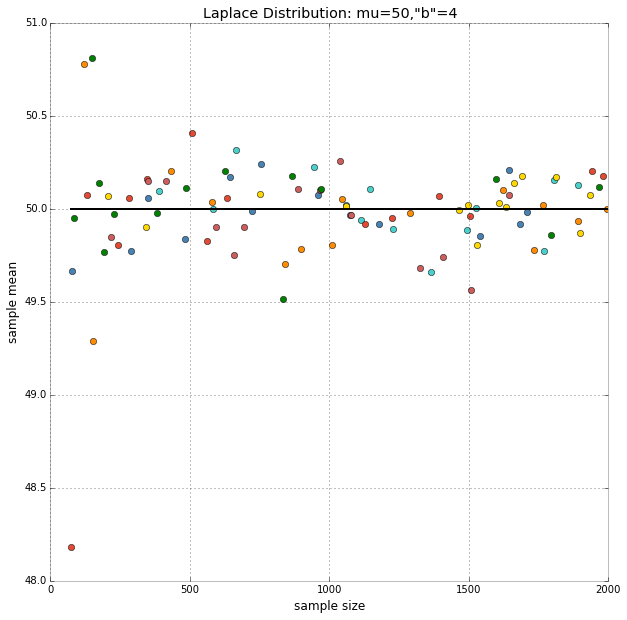

In [32]:
#create laplace distribution
distributions['lap'] = {}

lap_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes

print (lap_size)
# the "float" or "b" scale parameter should be >0 (real). We'll set it arbitrarily:
b = 4

for n in lap_size:
    distributions['lap'][n]=np.random.laplace(mymean,b,size=n)

means['lap'] = {}

#plot laplace distribution
fig_lap_mu_N = pl.figure(figsize=(10,10))
axlap = fig_lap_mu_N.add_subplot(111)
for nn in distributions['lap']:
    means['lap'][nn] = distributions['lap'][nn].mean()
    axlap.plot(nn, means['lap'][nn], 'o')
    axlap.set_title('Laplace Distribution: mu={},"b"={}'.format(mymean,b))
    axlap.set_xlabel('sample size')
    axlap.set_ylabel('sample mean')
    axlap.plot([min(lap_size), max(lap_size)],[mymean,mymean],'k')

[ 266 1606  869  398   65  800 1859  937  635  733  320 1963  246  858 1647
 1157  916  377  559  513  575  774  418 1151  937  463  265 1744 1512 1998
 1732  423  314  420 1816 1858  935 1134 1789 1448  793  475 1612 1431   61
 1252 1255  337  236 1207 1651 1100  281  214 1992 1144  338  225  369 1875
  151 1110 1078 1068   35 1987  222  917  391 1287 1336 1351  837 1839 1392
  221  301  194  478  488  956 1241 1495  377  707 1373  849  970  579  799
 1800 1544  416 1173 1749  147 1082 1411  908  864]


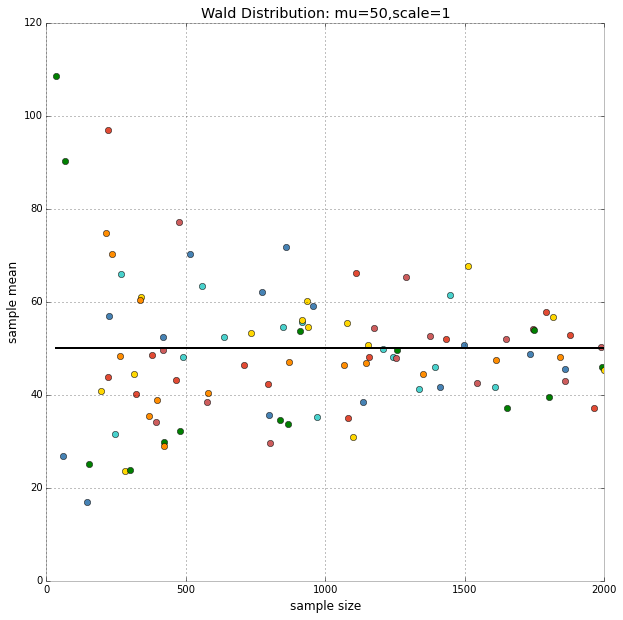

In [33]:
#create Wald, or "inverse Gaussian" distribution
distributions['wald'] = {}

wald_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (wald_size)
# the scale parameter should be >=0 (real). We'll set it arbitrarily:
wald_scale = 1

for n in wald_size:
    distributions['wald'][n]=np.random.wald(mymean,wald_scale,size=n)

means['wald'] = {}

#plot wald distribution
fig_wald_mu_N = pl.figure(figsize=(10,10))
axwald = fig_wald_mu_N.add_subplot(111)
for nn in distributions['wald']:
    means['wald'][nn] = distributions['wald'][nn].mean()
    axwald.plot(nn, means['wald'][nn], 'o')
    axwald.set_title('Wald Distribution: mu={},scale={}'.format(mymean,wald_scale))
    axwald.set_xlabel('sample size')
    axwald.set_ylabel('sample mean')
    axwald.plot([min(wald_size), max(wald_size)],[mymean,mymean],'k')

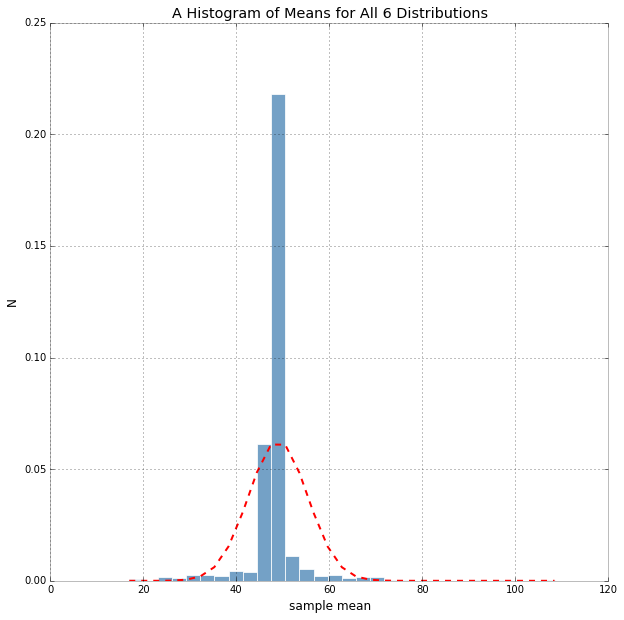

In [46]:
from scipy.stats import norm
from numpy import linspace
allmeans=[]
for n in distributions:
    for nn in means[n]:
        allmeans.append(means[n][nn])

# best fit of data
(mu, sigma) = norm.fit(allmeans)

fig_allmeans = pl.figure(figsize=(10,10))
axmeans = fig_allmeans.add_subplot(111)
n, bins, patches = axmeans.hist(allmeans,bins=30, normed=1, alpha=.75)
axmeans.set_title("A Histogram of Means for All 6 Distributions")
pl.xlabel('sample mean')
pl.ylabel('N')

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
axmeans.plot(bins, y, 'r--', linewidth=2)